In [2]:
import cv2
import numpy as np
import os
from random import shuffle
from tqdm import tqdm
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline

In [94]:
train_data = 'C:/Users/ignac/OneDrive/Desktop/Numeros/images/train'
test_data = 'C:/Users/ignac/OneDrive/Desktop/Numeros/images/test'

In [98]:
def train_data_with_label():
    train_images = []
    for i in tqdm(os.listdir(train_data)):
            path = train_data +'/'+ i
            img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
            img = cv2.resize(img, (64,64))
            print(img.shape)
            train_images.append([np.array(img), one_hot_label(i)])
    shuffle(train_images)
    return train_images

def test_data_with_label():
    test_images = []
    for i in tqdm(os.listdir(test_data)):
            path = test_data +'/'+ i
            img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
            img = cv2.resize(img, (64,64))
            print(img.shape)            
            test_images.append([np.array(img), one_hot_label(i)])
    return test_images

def one_hot_label(img):
       
    label = img.split('.')[0]
    if label == 'numero_0':
        ohl = np.array([1,0,0,0,0,0,0,0,0,0])
    elif label == 'numero_1':
        ohl = np.array([0,1,0,0,0,0,0,0,0,0])
    elif label == 'numero_2':
        ohl = np.array([0,0,1,0,0,0,0,0,0,0])
    elif label == 'numero_3':
        ohl = np.array([0,0,0,1,0,0,0,0,0,0])
    elif label == 'numero_4':
        ohl = np.array([0,0,0,0,1,0,0,0,0,0])
    elif label == 'numero_5':
        ohl = np.array([0,0,0,0,0,1,0,0,0,0])
    elif label == 'numero_6':
        ohl = np.array([0,0,0,0,0,0,1,0,0,0])
    elif label == 'numero_7':
        ohl = np.array([0,0,0,0,0,0,0,1,0,0])
    elif label == 'numero_8':
        ohl = np.array([0,0,0,0,0,0,0,0,1,0])
    elif label == 'numero_9':
        ohl = np.array([0,0,0,0,0,0,0,0,0,1])
    else:
        ohl = np.array([0,0,0,0,0,0,0,0,0,1])
    return ohl

In [83]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.optimizers import *

In [99]:
training_images = train_data_with_label()
testing_images = test_data_with_label()

tr_img_data = np.array([i[0] for i in training_images]).reshape(-1,64,64,1)
tr_lbl_data = np.array([i[1] for i in training_images])

tst_img_data = np.array([i[0] for i in testing_images]).reshape(-1,64,64,1)
tst_lbl_data = np.array([i[1] for i in testing_images])

100%|████████████████████████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 1666.79it/s]


(64, 64)
(64, 64)
(64, 64)
(64, 64)
(64, 64)
(64, 64)
(64, 64)
(64, 64)
(64, 64)
(64, 64)
(64, 64)
(64, 64)
(64, 64)
(64, 64)
(64, 64)
(64, 64)
(64, 64)
(64, 64)
(64, 64)
(64, 64)
(64, 64)
(64, 64)
(64, 64)
(64, 64)
(64, 64)
(64, 64)
(64, 64)
(64, 64)
(64, 64)
(64, 64)


100%|████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 1481.35it/s]

(64, 64)
(64, 64)
(64, 64)
(64, 64)
(64, 64)
(64, 64)
(64, 64)
(64, 64)
(64, 64)
(64, 64)
(64, 64)
(64, 64)
(64, 64)
(64, 64)
(64, 64)
(64, 64)
(64, 64)
(64, 64)
(64, 64)
(64, 64)


In [137]:
model = Sequential()

model.add(InputLayer(input_shape=[64,64,1]))
model.add(Conv2D(filters=32,kernel_size=5,strides=1,padding='same',activation='tanh'))
model.add(MaxPool2D(pool_size=5,padding='same'))

model.add(Conv2D(filters=50,kernel_size=5,strides=1,padding='same',activation='tanh'))
model.add(MaxPool2D(pool_size=5,padding='same'))

model.add(Conv2D(filters=80,kernel_size=5,strides=1,padding='same',activation='tanh'))
model.add(MaxPool2D(pool_size=5,padding='same'))

model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(512,activation='tanh'))
model.add(Dropout(rate=0.5))
model.add(Dense(10,activation='softmax'))
optimizer = Adam(lr=1e-3)

model.compile(optimizer=optimizer, loss='categorical_crossentropy',metrics=['accuracy'])
model.fit(x=tr_img_data,y=tr_lbl_data,epochs=50,batch_size=100)
model.summary()

Epoch 1/50
1/1 [==============================] - 1s 582ms/step - loss: 2.4303 - accuracy: 0.1000
Epoch 2/50
1/1 [==============================] - 0s 37ms/step - loss: 2.3792 - accuracy: 0.1000
Epoch 3/50
1/1 [==============================] - 0s 67ms/step - loss: 2.3878 - accuracy: 0.1000
Epoch 4/50
1/1 [==============================] - 0s 73ms/step - loss: 2.2631 - accuracy: 0.2333
Epoch 5/50
1/1 [==============================] - 0s 40ms/step - loss: 2.3306 - accuracy: 0.1000
Epoch 6/50
1/1 [==============================] - 0s 71ms/step - loss: 2.3824 - accuracy: 0.1333
Epoch 7/50
1/1 [==============================] - 0s 39ms/step - loss: 2.3305 - accuracy: 0.1333
Epoch 8/50
1/1 [==============================] - 0s 38ms/step - loss: 2.2873 - accuracy: 0.1000
Epoch 9/50
1/1 [==============================] - 0s 39ms/step - loss: 2.3393 - accuracy: 0.1000
Epoch 10/50
1/1 [==============================] - 0s 68ms/step - loss: 2.2281 - accuracy: 0.1000
Epoch 11/50
1/1 [===========

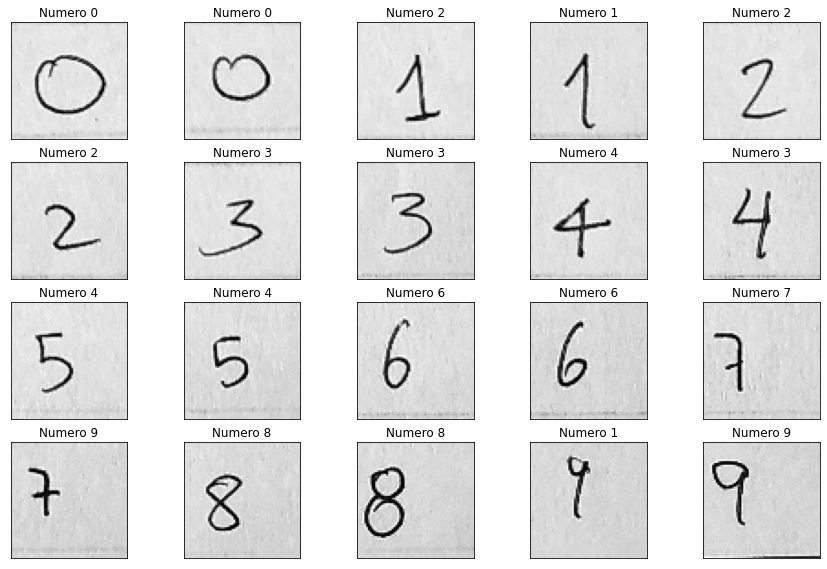

In [138]:
fig=plt.figure(figsize=(15,15))

for cnt, data in enumerate(testing_images[0:40]):
    y = fig.add_subplot(6,5,cnt+1)
    img = data[0]
    data = img.reshape(1,64, 64,1)
    model_out = model.predict([data])
    
    if np.argmax(model_out) == 0:
        str_label = 'Numero 0'
    elif np.argmax(model_out) == 1:
        str_label = 'Numero 1'
    elif np.argmax(model_out) == 2:
        str_label = 'Numero 2'
    elif np.argmax(model_out) == 3:
        str_label = 'Numero 3'
    elif np.argmax(model_out) == 4:
        str_label = 'Numero 4'
    elif np.argmax(model_out) == 5:
        str_label = 'Numero 5'
    elif np.argmax(model_out) == 6:
        str_label = 'Numero 6'
    elif np.argmax(model_out) == 7:
        str_label = 'Numero 7'
    elif np.argmax(model_out) == 8:
        str_label = 'Numero 8'
    else:
        str_label = 'Numero 9'
        
    y.imshow(img, cmap='gray')
    plt.title(str_label)
    y.axes.get_xaxis().set_visible(False)
    y.axes.get_yaxis().set_visible(False)

In [144]:
score = model.evaluate(x=tst_img_data, y=tst_lbl_data, verbose=0)
print('Test loss:', score[0]) 
print('Test accuracy:', score[1])

Test loss: 0.9105130434036255
Test accuracy: 0.699999988079071
